# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
micecount = merge_df['Mouse ID'].value_counts()
print("Count unique mice count:", len(micecount))
recordcount = merge_df['Mouse ID'].count()
print("Count records:", recordcount)



Count unique mice count: 249
Count records: 1893


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
if not duplicates.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicates[['Mouse ID', 'Timepoint']])
else:
    print("No mouse IDs with duplicate time points.")


Mouse IDs with duplicate time points:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
merge_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
#Note: Borrowed suggestion on printing the before and after counts after inquiry with ChatGPT


# Create a new DataFrame without duplicate rows based on 'Mouse ID' and 'Timepoint'
merge_clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

# Display the count after removing duplicates
print("Count of records after removing duplicates:", len(merge_clean_df))

newmicecount = merge_clean_df['Mouse ID'].value_counts()
print("Count unique mice count:", len(newmicecount))



Count of records after removing duplicates: 1883
Count unique mice count: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = merge_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_statistics.columns = ['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance', 'Tumor Volume Std Var', 'Tumor Volume SEM']
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Var,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

adv_summary_statistics = merge_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(adv_summary_statistics)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     151
Name: Drug Regimen, dtype: int64


<Axes: >

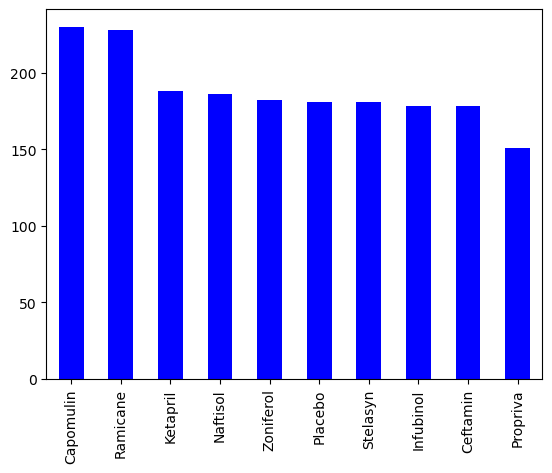

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = merge_clean_df["Drug Regimen"].value_counts()
print(mice_count)
mice_count.plot(kind='bar',color='blue')


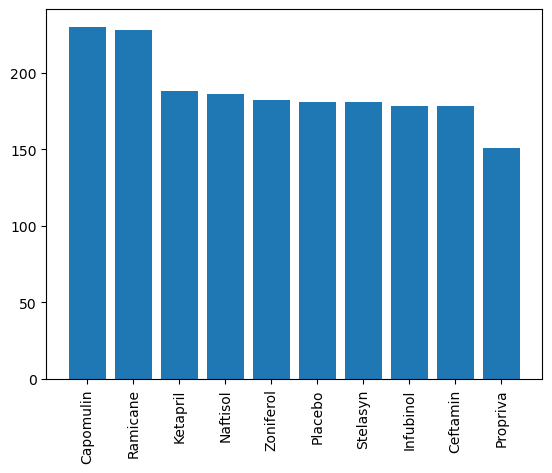

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x=mice_count.index
y=mice_count.values
plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()



Male      958
Female    925
Name: Sex, dtype: int64


<Axes: ylabel='Sex'>

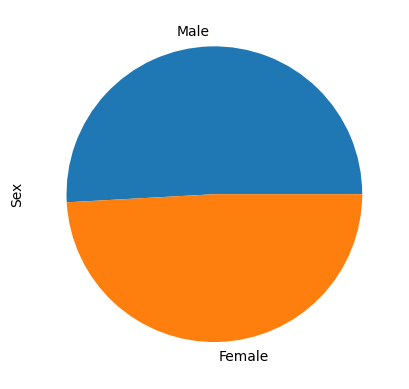

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = merge_clean_df["Sex"].value_counts()
print(gender_count)
gender_count.plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1a4949d5bd0>,
 [Text(-0.030277540496140426, 1.099583225836728, 'Male'),
  Text(0.030277540496140783, -1.099583225836728, 'Female')],
 [Text(-0.016515022088803868, 0.5997726686382152, '50.9%'),
  Text(0.016515022088804062, -0.5997726686382152, '49.1%')])

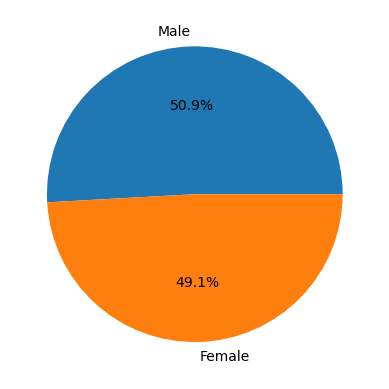

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = merge_clean_df["Sex"].value_counts()

plt.pie(gender_count, labels=gender_count.index,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxt = merge_clean_df.groupby('Mouse ID')['Timepoint'].max()
maxt

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge2 = pd.merge(maxt, merge_clean_df, on=['Mouse ID', 'Timepoint'], how='outer')
merge2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatmentdata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugtreat in treatment: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    drugdata = merge2.loc[merge2['Drug Regimen']==drugtreat]['Tumor Volume (mm3)']
    
    # add subset 
    treatmentdata.append(drugdata)
    
    # Determine outliers using upper and lower bounds
    quartiles = drugdata.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    outlier_occupancy = drugdata.loc[(drugdata< lower_bound) | (drugdata> upper_bound)]
    outlier_occupancy


https://matplotlib.org/stable/gallery/statistics/boxplot.html
https://matplotlib.org/stable/gallery/statistics/boxplot_color.html
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
> Activity 3 - 2

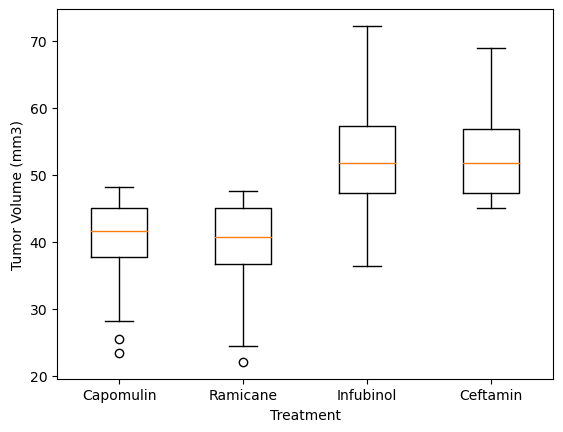

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(treatmentdata, labels=treatment)

plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

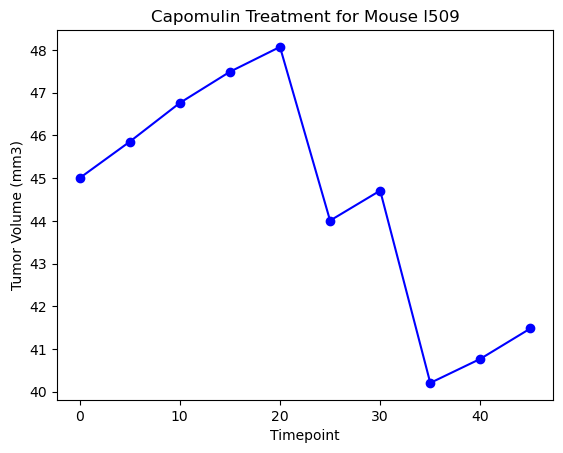

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse_id = "l509"  # Replace "YourMouseID" with the actual ID of the mouse

# Filter the data for the selected mouse treated with Capomulin
capomulin_mouse_data = merge_clean_df.loc[(merge_clean_df['Drug Regimen'] == 'Capomulin') & (merge_clean_df['Mouse ID'] == capomulin_mouse_id)]


plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for Mouse {capomulin_mouse_id}')

# Show the plot
plt.show()

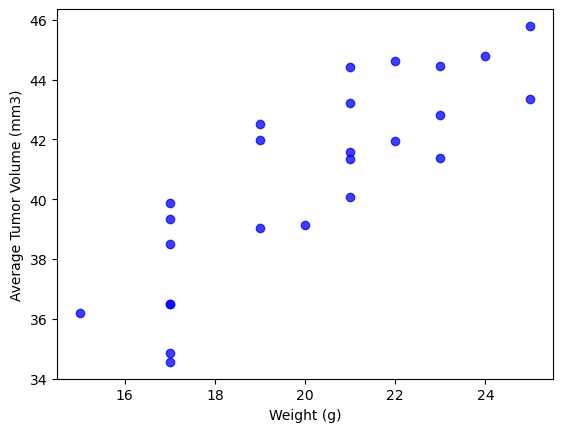

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = merge_clean_df[merge_clean_df['Drug Regimen'] == 'Capomulin']

# Calculating the mean tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Obtain the corresponding weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', alpha=0.75)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


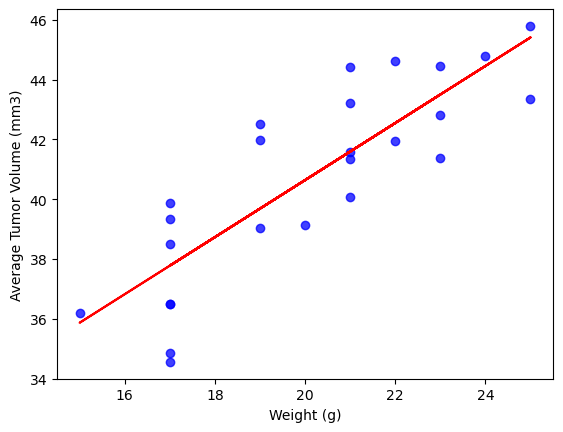

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = merge_clean_df[merge_clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Obtain the corresponding weights for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')

# Perform linear regression
slope, intercept, _, _, _ = linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', alpha=0.75)

# Add the regression line to the plot
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='r', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()